## Pair Programming Intro Regresión Lineal

In [22]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics



In [23]:
# Decidimos comenzar haciendo un modelo con ambas variables categóricas con encoding ordinal
df = pd.read_csv('../Datos/vinos_encoding_map_map.csv', index_col = 0)
df.head(2)

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box,education_enc,marital_status_enc
0,5524,1957,0.235696,0,0,0.307039,635,1.551577,1.679702,2.462147,...,0.349414,1.409304,2.51089,-0.550785,0.693904,2.011116,635.0,14.026740,2,1
1,2174,1954,-0.235454,1,1,-0.383664,11,-0.636301,-0.713225,-0.650449,...,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,-0.845274,11.0,3.141178,2,1


El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:
* Deberéis separar la X y la y.
* Deberéis crear el train y el test.
* Ajustar vuestro modelo.

Separamos los datos de la x y la y

In [24]:
# Eliminamos de la X todas las variables que tienen relación con la variable respuesta
X = df.drop(["mnt_wines_box", 'mntwines_sin_cero', 'mntwines'], axis = 1)
y = df["mnt_wines_box"]

In [25]:
# Comprobamos x

X.head(2)

,id,year_birth,income,kidhome,teenhome,recency,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,education_enc,marital_status_enc
0,5524,1957,0.235696,0,0,0.307039,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.51089,-0.550785,0.693904,2.011116,2,1
1,2174,1954,-0.235454,1,1,-0.383664,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,-0.845274,2,1


In [26]:
# Comprobamos y
y.head(2)

0    14.026740
1     3.141178
Name: mnt_wines_box, dtype: float64

Dividimos nuestro modelo en train y test.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Iniciamos la regresión lineal.

In [28]:
lr = LinearRegression(n_jobs=-1)

Ajustamos el modelo.

In [29]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

Hacemos las predicciones.

In [30]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [31]:
# Extraemos los valores reales y predichos y los unimos
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
792,1.616108,5.039032,Train
1271,12.433631,13.747659,Train
1538,15.948894,12.863653,Train
668,4.727528,4.588417,Train
1975,3.796126,12.729574,Train


In [32]:
# Creamos una nueva columna donde calculamos los residuos y así comprobar la calidad de nuestro modelo
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
792,1.616108,5.039032,Train,-3.422924
1271,12.433631,13.747659,Train,-1.314028
1538,15.948894,12.863653,Train,3.085241
668,4.727528,4.588417,Train,0.139111
1975,3.796126,12.729574,Train,-8.933448


> Los residuos pueden ser nulos, positivos o negativos:

- Si son nulos entonces no existe ningún error en la estimación, ya que, los valores observados coinciden con los valores estimados.

- Si es positivo entonces el valor observado de Y es mayor que el valor estimado lo que implica que se infraestima la variable Y, en nuestro caso el precio de las casas.

- Si el residuo es negativo entonces el valor observado de Y es menor que su valor estimado y por lo tanto se sobreestima la variable Y, en nuestro caso el precio de las casas

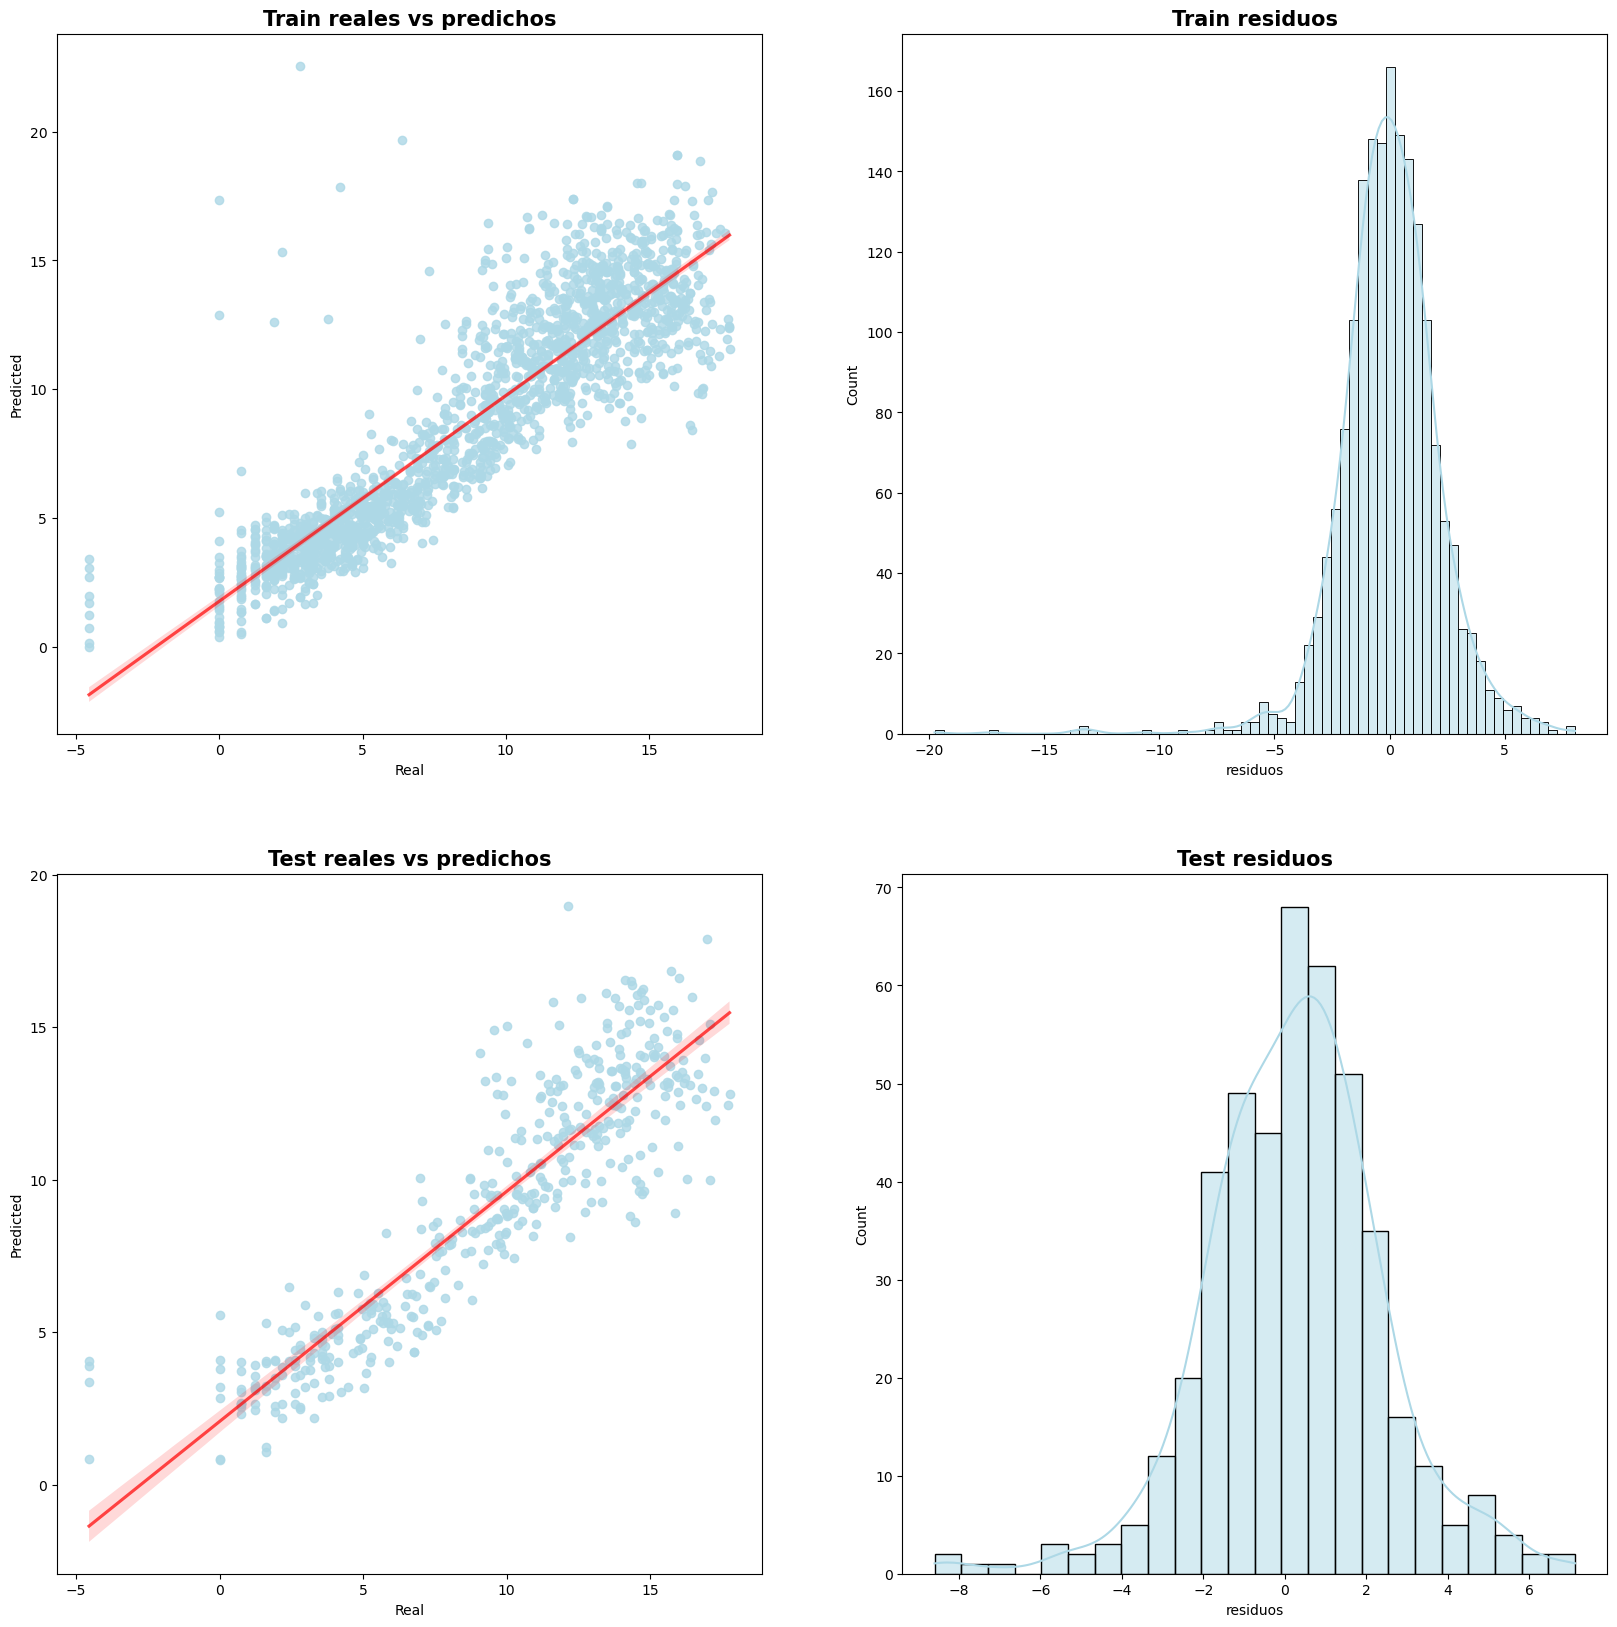

In [33]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "lightblue",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "lightblue",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="lightblue",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "lightblue",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

> Con estas gráficas vemos que los valores reales y predichos tienen más o menos una relación lineal, no son muy dispares.
>
> Vemos también que los residuos tienen una distribución normal en torno al cero, por lo que la mediana de las predicciones ha tenido un residuo de 0. 

Realizamos validación cruzada para ver si hay mejoría en nuestras métricas

In [34]:
# Validación cruzada con dos métricas que nos interesan

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'), #las dos métricas que utilizaremos
                cv        = 10)

# Convertimos a dataframe
cv_scores = pd.DataFrame(cv_scores)
cv_scores


,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.003625,0.001370,0.725676,-2.517154
1,0.002025,0.000983,0.829968,-2.190583
2,0.001852,0.000998,0.800411,-2.104840
3,0.001939,0.000908,0.776529,-2.356612
4,0.001764,0.001017,0.819692,-1.998145
5,0.002338,0.001280,0.842266,-1.969550
6,0.002122,0.000888,0.833772,-1.941189
7,0.001639,0.000857,0.782606,-2.219437
8,0.001878,0.000936,0.720131,-2.503152
9,0.001867,0.000912,0.163613,-4.544999


In [35]:
# Calculamos la media para cada una de las métricas

print(f'la media para el r2 es {round(cv_scores["test_r2"].mean(),2)}')
print(f'la media para el RMSE es {abs(round(cv_scores["test_neg_root_mean_squared_error"].mean(),2))}')

la media para el r2 es 0.73
la media para el RMSE es 2.43


> El resultado del r2 nos dice que las variables predictoras de nuestro modelo explican el 73% de la variación de la variable respuesta
>
> El RMSE nos dice la desviación real de la predicción con respecto a nuestros datos reales. Sin embargo, está normalizada, por lo que tendremos que invertir la normalización para interpretarla mejor.

Cuando calculemos las métricas de la regresión lineal podremos comparar

### Cálculo de las métricas

In [36]:
#entrenamiento
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# test
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.798638899872646
El MAE es 1.5473483203786738
El MSE es 4.754429161585985
EL RMSE es  2.180465354364977
Para el conjunto test:---------------
El valor de r2 score es  0.8082583477544117
El MAE es 1.6369864580196516
El MSE es 4.687012029658208
EL RMSE es  2.164950814604851


Convertimos en dataframe

In [37]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "Linear Regresion"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,1.636986,4.687012,2.164951,0.808258,test,Linear Regresion
1,1.547348,4.754429,2.180465,0.798639,train,Linear Regresion


- En el caso de test en R² tenemos un valor de 0.80, es decir, nuestro modelo es capaz de explicar un 80% de la variación en las ventas de vino. Es decir, nuestras variables predictoras explican en un 80% de la variación de los montos de venta de vino y solamente un 20% de la variación no está explicado por ninguna de las variables que tenemos.

- Con el MAE(Mean absolute error), el MSE(Mean Squared Error) y RMSE(Root Mean Squared Error), vemos que los valores en general no son muy grandes por lo que podríamos concluír que nuestro modelo es medianamente bueno. 

- Observamos también que las métricas salieron mejor que con el cross validation, por lo que preferiremos el modelo de regresión lineal en este caso.

Calculamos el valor real del RMSE, invirtiendo la normalización con una regla de tres

In [38]:
# Escogemos los valores del RMSE del train
valor_rmse=df_resultados['RMSE'][1]

In [39]:
# Extraemos el valor máximo de la cantidad gastada en vinos
valor_maximo_mnt_wines= 1493.000000 #extraido del dataframe original

In [40]:
# Extraemos el valor máximo normalizado
valor_maximo_box=df["mnt_wines_box"].max()

In [41]:
# Calculamos la regla de tres
valor_rmse_real= (valor_maximo_mnt_wines * valor_rmse)/ valor_maximo_box
valor_rmse_real

182.7959562150315

> Realizamos una regla de 3 para observar el RMSE en dólares, comparando con el valor máximo de nuestra columna mnt_wines original, que es el monto máximo gastado en vinos en nuestro data frame.
> 
> Concluimos que las predicciones de nuestro modelo pueden variar hasta $183 por lo que nuestro modelo no se ajusta demasiado bien, dado que nuestros rango de ventas de vinos es muy pequeño ( de 0 como mínimo y de 1493 como máximo), esto se podría deber a que no se cumplieron la asunciones.

In [42]:

df_resultados.to_csv("../Datos/vinos_regresion.csv")